# Practica 7
Carlos Saiz Hernández

## Imports

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Funciones Extras

In [30]:
def imprimirTablaHistograma(tabla):
    print ('k\t|Nk\t|Pk')
    print ('----------------------')
    for key, value in tabla.items():
        print (key, '\t|', value[0], '\t|', value[1])
        print ('----------------------')
        
    # Preparamos el histograma
    keys = tabla.keys() 
    values = [tabla[key][1] for key in keys]
    plt.bar(keys, values, edgecolor='black')
    plt.show()

##  1. Distribución de grado

In [31]:
def probabilidadesGrafo(G):
    tabla={}
    nodos_toltales = G.number_of_nodes()

    # Obtenemos las probabilidades de los grados de los nodos
    for grados in G.degree():
        grado = grados[1]
        if grado in tabla:
            valor = tabla[grado][0] + 1
            probabilidad = valor / nodos_toltales 
            tabla[grado] = (valor, probabilidad)
        else:
            tabla[grado] = (1, 1/nodos_toltales)

    return tabla

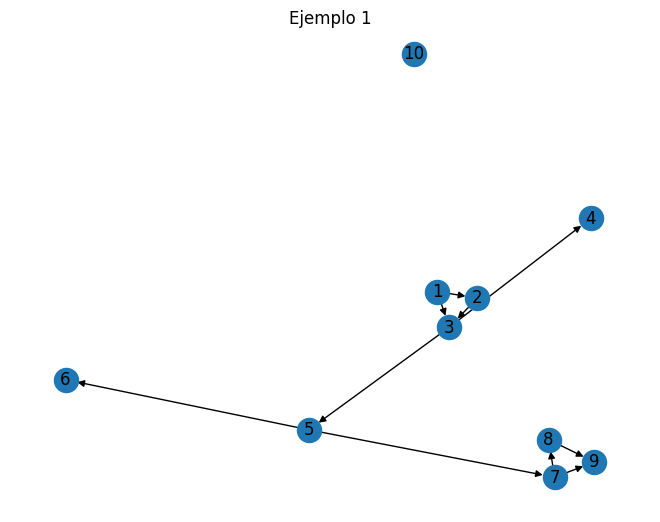

Tabla de probabilidades
k	|Nk	|Pk
----------------------
2 	| 4 	| 0.4
----------------------
4 	| 1 	| 0.1
----------------------
1 	| 2 	| 0.2
----------------------
3 	| 2 	| 0.2
----------------------
0 	| 1 	| 0.1
----------------------


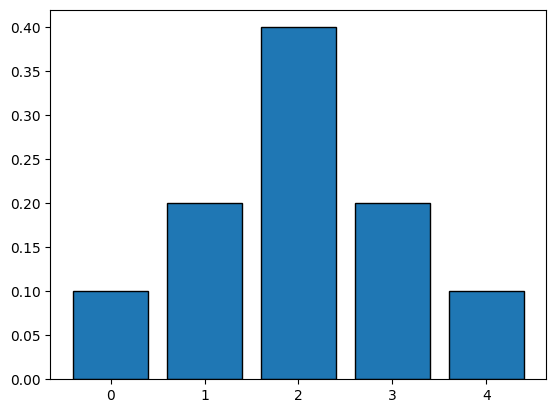

In [32]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (7, 8), (7, 9), (8, 9)])
G.add_node(10) # Con esto añadimos el nodo 10 de forma aislada
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title('Ejemplo 1')
plt.show()

# copiamos la tabla y el histograma del ejercico
tabla = probabilidadesGrafo(G)
print ('Tabla de probabilidades')
imprimirTablaHistograma(tabla)

### In-degree

In [33]:
def probabilidadesGrafoDirigidoIndegree(G):
    diccionario = {}
    nodos_toltales = G.number_of_nodes()

    # Calcular las frecuencias de in-degree
    for grados in G.in_degree():
        grado = grados[1]
        if grado in diccionario:
            valor = tabla[grado][0] + 1
            probabilidad = valor / nodos_toltales 
            diccionario[grado] = (valor, probabilidad)
        else:
            diccionario[grado] = (1, 1/nodos_toltales)


    return diccionario

### Out-degree

In [34]:
def probabilidadesGrafoDirigidoOutdegree(G):
    diccionario = {}
    nodos_toltales = G.number_of_nodes()

    # Calcular las frecuencias de in-degree
    for grados in G.out_degree():
        grado = grados[1]
        if grado in diccionario:
            valor = tabla[grado][0] + 1
            probabilidad = valor / nodos_toltales 
            diccionario[grado] = (valor, probabilidad)
        else:
            diccionario[grado] = (1, 1/nodos_toltales)


    return diccionario

### Imprimimos las tablas e histogramas

	IN-DEGREE

k	|Nk	|Pk
----------------------
0 	| 2 	| 0.2
----------------------
1 	| 3 	| 0.3
----------------------
2 	| 5 	| 0.5
----------------------


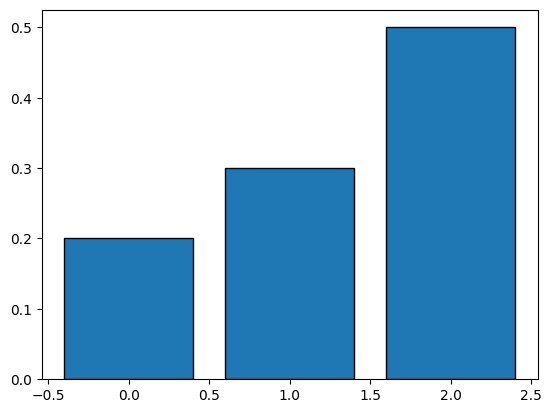

	OUT-DEGREE

k	|Nk	|Pk
----------------------
2 	| 5 	| 0.5
----------------------
1 	| 3 	| 0.3
----------------------
0 	| 2 	| 0.2
----------------------


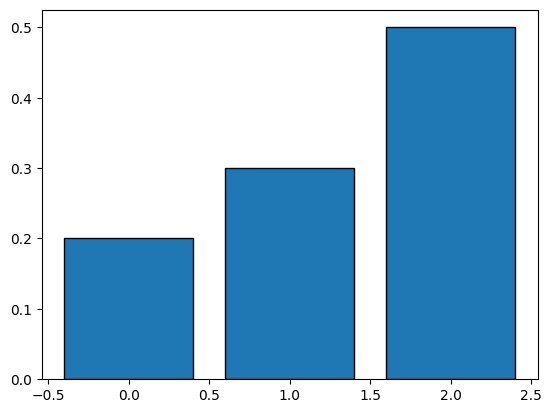

In [35]:
tabla_indegree = probabilidadesGrafoDirigidoIndegree(G)
print ('\tIN-DEGREE\n')
imprimirTablaHistograma(tabla_indegree)
tabla_outdegree = probabilidadesGrafoDirigidoOutdegree(G)
print ('\tOUT-DEGREE\n')
imprimirTablaHistograma(tabla_outdegree)

## 2. Distribuciones Power Law

### 2.1 Dadas las redes de la figura, ¿cuál de ellas presenta una propiedad scale-free?
![Example Image](imagenes/2.1.png) <br> La tercera imagen es aquella que presenta una propiedad scale-free

### 2.2 De los siguientes mecanismos ¿cuál de ellos podría generar propiedad scale-free con más probabilidad?
La segunda opción (usuario añade un enlace a la página que aparece primero en una búsqueda de Google) tiene una mayor probabilidad de generar una red con propiedades scale-free.

## 3. Estudio de la distribución de grado de una red


In [36]:
G3 = nx.read_gexf('internet_routers-22july06-2.gexf')

### 3.1 Calcular estadisticas

In [37]:
def estadisticas(G):
    num_nodes = G.number_of_nodes()

    num_edges = G.number_of_edges()

    avg_degree = sum(dict(G.degree()).values()) / num_nodes

    max_degree = max(dict(G.degree()).values())

    min_degree = min(dict(G.degree()).values())

    print("Número de nodos:", num_nodes)
    print("Número de enlaces:", num_edges)
    print("Grado medio:", avg_degree)
    print("Grado máximo:", max_degree)
    print("Grado mínimo:", min_degree)

### 3.2 Histograma

In [38]:
def histograma(G):
    degree_list = [degree for node, degree in G.degree()]

    plt.hist(degree_list, bins=range(min(degree_list), max(degree_list) + 1), edgecolor='black')

    plt.xlabel('Grados')
    plt.ylabel('Frecuencia')
    plt.title('Histograma')

    plt.show()

### 3.3 Histograma con clase variable logaritmica

In [39]:
def histogramaLog(G):
    degree_list = [degree for node, degree in G.degree()]
    
    bins = np.logspace(np.log10(min(degree_list)), np.log10(max(degree_list)), num=20)

    plt.hist(degree_list, bins=bins, edgecolor='black')
    plt.xscale('log')

    plt.xlabel('Grados (log scale)')
    plt.ylabel('Frecuencia')
    plt.title('Histograma logaritmico')

    plt.show()

def histogramaModeladoAGrafo(G, pendiente: float, intercepto: float):
    
    grados = list(dict(G.degree()).values())
    max_grado = max(grados)
    exponenteMaximo = int(np.ceil(np.log(max_grado))) # Calculamos el valor de 2^n, mas cercano al numero del grado maxino
    valorMaximo = 2**exponenteMaximo
    
    # Crear histograma
    bins = np.array([2**i for i in range(0,exponenteMaximo+1)])    
    frecuencias, bins = np.histogram(grados, bins=bins)
    frecuencias_normalizadas = frecuencias / bins[:-1]
        
    valoresEjeX = np.log (bins[:-1])
    valoresEjeY = np.log (frecuencias_normalizadas) 
    valoresRecta = pendiente * valoresEjeX + intercepto
        
    # Dibujar la recta
    plt.figure()
    plt.bar(bins[:-1] , frecuencias_normalizadas, width=np.diff(bins), edgecolor="black", align="edge")
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(valoresEjeX, valoresEjeY, color='blue', label='Datos')
    plt.plot(valoresEjeX, valoresRecta, color='red', linestyle='-', label='Regresión lineal')
    plt.title('Regresión lineal de los datos')
    plt.xlabel('Log de los bins')
    plt.ylabel('Log de la frecuencia normalizada')
    plt.legend()
    plt.grid(True)
    plt.show()

### 3.4 Estimación parámetro de power law

In [40]:
def estimacionPowerLaw(G):
    degree_list = [degree for node, degree in G.degree()] # Lista de grados de los nodos

    exponenteMaximo = int(np.ceil(np.log2(max(degree_list))))
    bins = np.array([2**i for i in range(0,exponenteMaximo+1)])    
    frecuencias, bins = np.histogram(degree_list, bins=bins)
    bins = bins[:-1]
    frecuencias_normalizadas = frecuencias / bins
    
    # Realizar una regresión lineal en el espacio log-log
    pendiente, intercepto, y, z, p = stats.linregress(np.log10(bins), np.log10(frecuencias_normalizadas))

    return pendiente, intercepto

### 3.4 Estimación mediante distribución acumulada

In [41]:
def calcularDistribucionAcumulada(G):
    # Ordenar los grados de los nodos de forma decreciente
    datos = [degree for node, degree in G.degree()]
    sorted_datos = sorted(datos, reverse=True)

    # Crear una columna de ranking del nodo en la ordenación
    rank_datos = np.arange(1, len(sorted_datos) + 1)

    distribucionAcumulada = rank_datos / G.number_of_nodes()

    x = np.log(sorted_datos)
    y = np.log(distribucionAcumulada)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calcular alpha
    alpha = -slope + 1
    
    # Calcular R^2
    r_squared = r_value**2
    
    print(f"Parámetro alpha: {alpha:.4f}")
    
    # Ajustamos los valores de la regresion lineal
    y = slope * x + intercept

    # Graficar la distribucion acumulada
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos')
    plt.plot(x, y, color='red', linestyle='-', label='Regresión lineal')

    plt.title('Distribución Acumulada')
    plt.xlabel('ki')
    plt.ylabel('ri/n')

    plt.legend()
    plt.grid(True)
    plt.show()


Estadísticas del grafo G3
Número de nodos: 22963
Número de enlaces: 48436
Grado medio: 4.218612550624918
Grado máximo: 2390
Grado mínimo: 1

Histograma del grafo G3


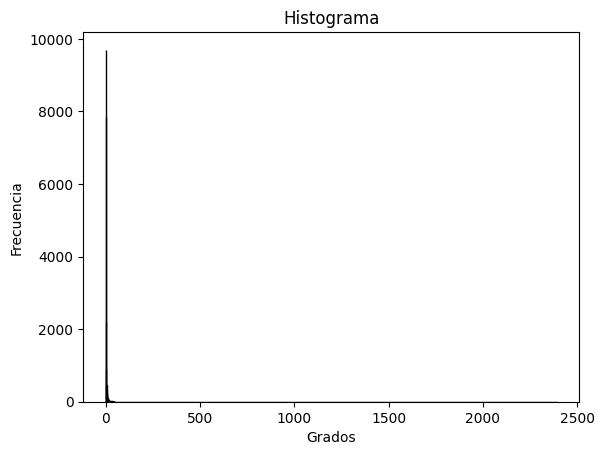


Histograma logarítmico del grafo G3


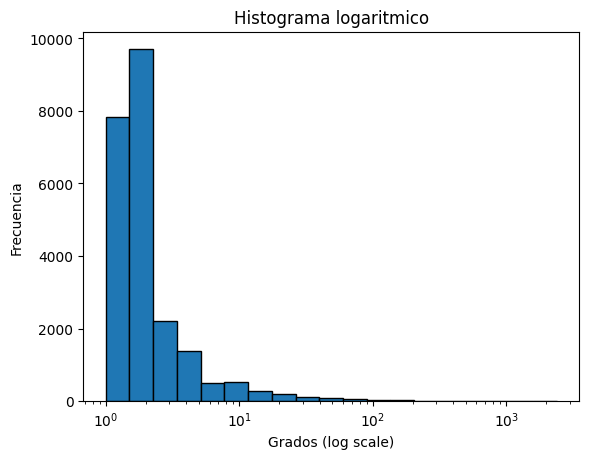


Estimación mediante Power Law del grafo G3
Exponente de la ley de potencias: -2.172024547746555

Histograma logarítmico adaptado a los valores del grafo del grafo,
juto con la recta estimada G3


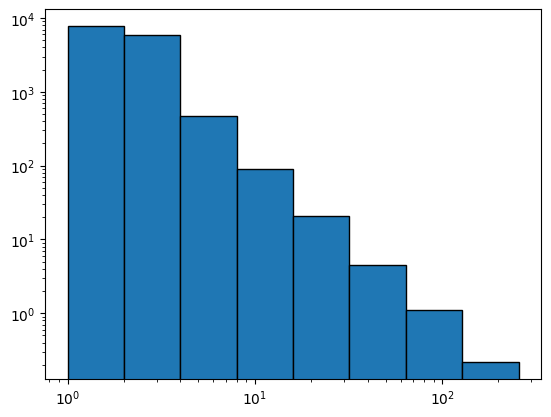

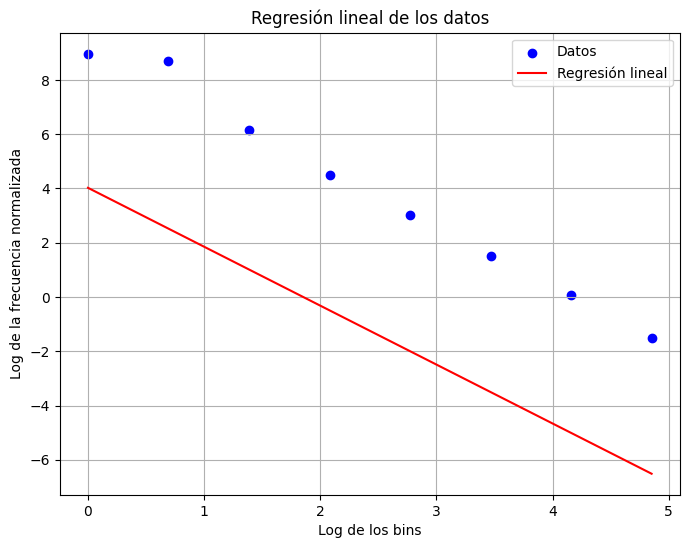


Estimación meiantes distribución acumulada del grafo G3
Parámetro alpha: 2.2643


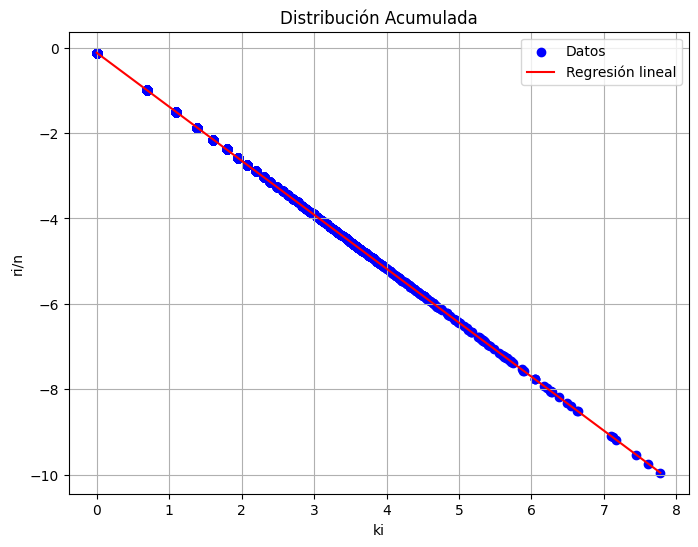

In [42]:
print ('\nEstadísticas del grafo G3')
estadisticas(G3)
print ('\nHistograma del grafo G3')
histograma(G3)
print ('\nHistograma logarítmico del grafo G3')
histogramaLog(G3)
print ('\nEstimación mediante Power Law del grafo G3')
pendiente, intercepto = estimacionPowerLaw(G3)
print("Exponente de la ley de potencias:", pendiente)
print ('\nHistograma logarítmico adaptado a los valores del grafo del grafo,\njuto con la recta estimada G3')
histogramaModeladoAGrafo(G3, float(pendiente), float(intercepto))
print ('\nEstimación meiantes distribución acumulada del grafo G3')
calcularDistribucionAcumulada(G3)

### Preparamos el histograma para los valores del grafo